# Ethereum Fraud Detection Dataset - Exploratory Data Analysis

## Objective
This notebook performs comprehensive exploratory data analysis (EDA) on the Ethereum fraud detection dataset to understand:
- Dataset structure and column information
- Data quality and missing values
- Statistical patterns and distributions
- Relationships between features
- Differences between fraud and normal transactions

## Dataset Information
- **Source**: Ethereum blockchain transaction data
- **Task**: Binary fraud detection (FLAG: 0=Normal, 1=Fraud)
- **Features**: Transaction patterns, network metrics, ERC20 token data

## 1. Import Required Libraries

In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. Load the Dataset

In [2]:
# Load the dataset
data_path = "../transaction_dataset.csv"
df = pd.read_csv(data_path)

# Drop unnamed index column if present
if "Unnamed: 0" in df.columns or df.columns[0].startswith("Unnamed"):
    df = df.iloc[:, 1:]

print(f"📊 Dataset loaded successfully!")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\n🔍 First 5 rows:")
df.head()

📊 Dataset loaded successfully!
Shape: 9,841 rows × 50 columns
Memory usage: 5.31 MB

🔍 First 5 rows:


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


## 3. Dataset Overview and Basic Information

## 2.1 Dataset Column Descriptions

### Understanding the 50 Features in the Ethereum Fraud Detection Dataset

This dataset contains comprehensive information about Ethereum addresses and their transaction patterns. Here's a detailed breakdown of all columns:

#### **🔍 Identification Columns**
- **Index**: Sequential record number
- **Address**: Ethereum wallet address (hexadecimal format starting with 0x)
- **FLAG**: Target variable (0 = Normal, 1 = Fraud) - **This is what we're trying to predict!**

#### **⏰ Temporal Features (Transaction Timing)**
- **Avg min between sent tnx**: Average minutes between outgoing transactions
- **Avg min between received tnx**: Average minutes between incoming transactions  
- **Time Diff between first and last (Mins)**: Total time span of account activity in minutes

#### **📊 Basic Transaction Counts**
- **Sent tnx**: Total number of transactions sent by this address
- **Received Tnx**: Total number of transactions received by this address
- **Number of Created Contracts**: How many smart contracts this address has created
- **Unique Received From Addresses**: Number of unique addresses that sent transactions to this address
- **Unique Sent To Addresses**: Number of unique addresses this address sent transactions to

#### **💰 Transaction Value Statistics (Regular Ether)**
- **min value received**: Smallest amount of Ether received in a single transaction
- **max value received**: Largest amount of Ether received in a single transaction
- **avg val received**: Average amount of Ether received per transaction
- **min val sent**: Smallest amount of Ether sent in a single transaction
- **max val sent**: Largest amount of Ether sent in a single transaction
- **avg val sent**: Average amount of Ether sent per transaction

#### **🏭 Smart Contract Interaction Values**
- **min value sent to contract**: Smallest amount sent to smart contracts
- **max val sent to contract**: Largest amount sent to smart contracts
- **avg value sent to contract**: Average amount sent to smart contracts

#### **📈 Aggregate Transaction Metrics**
- **total transactions**: Total number of all transactions (including contract creation)
- **total Ether sent**: Sum of all Ether sent by this address
- **total ether received**: Sum of all Ether received by this address
- **total ether sent contracts**: Sum of all Ether sent to smart contracts
- **total ether balance**: Net balance (received - sent)

#### **🪙 ERC20 Token Features (Token Transactions)**
*ERC20 tokens are custom tokens built on Ethereum (like USDC, DAI, etc.)*

**ERC20 Transaction Counts:**
- **Total ERC20 tnxs**: Total number of ERC20 token transactions
- **ERC20 uniq sent addr**: Number of unique addresses this account sent tokens to
- **ERC20 uniq rec addr**: Number of unique addresses this account received tokens from
- **ERC20 uniq sent addr.1**: Alternative count of unique sent addresses
- **ERC20 uniq rec contract addr**: Number of unique smart contracts that sent tokens to this address

**ERC20 Timing Features:**
- **ERC20 avg time between sent tnx**: Average time between token sends
- **ERC20 avg time between rec tnx**: Average time between token receives
- **ERC20 avg time between rec 2 tnx**: Alternative timing metric for receives
- **ERC20 avg time between contract tnx**: Average time between contract token transactions

**ERC20 Value Features:**
- **ERC20 total Ether received**: Total value of tokens received (in Ether equivalent)
- **ERC20 total ether sent**: Total value of tokens sent (in Ether equivalent)
- **ERC20 total Ether sent contract**: Total value of tokens sent to contracts
- **ERC20 min val rec**: Minimum token amount received
- **ERC20 max val rec**: Maximum token amount received
- **ERC20 avg val rec**: Average token amount received
- **ERC20 min val sent**: Minimum token amount sent
- **ERC20 max val sent**: Maximum token amount sent
- **ERC20 avg val sent**: Average token amount sent
- **ERC20 min val sent contract**: Minimum amount sent to contracts
- **ERC20 max val sent contract**: Maximum amount sent to contracts
- **ERC20 avg val sent contract**: Average amount sent to contracts

**ERC20 Token Types:**
- **ERC20 uniq sent token name**: Number of different token types sent
- **ERC20 uniq rec token name**: Number of different token types received
- **ERC20 most sent token type**: Most frequently sent token name
- **ERC20_most_rec_token_type**: Most frequently received token name

#### **🎯 Key Insights:**
1. **Behavioral Patterns**: Timing features reveal transaction frequency and regularity
2. **Network Analysis**: Unique address counts show how connected an address is
3. **Financial Patterns**: Value statistics reveal spending/receiving behaviors
4. **Token Diversity**: ERC20 features show involvement in the token ecosystem
5. **Contract Interaction**: Smart contract features indicate DeFi participation

In [4]:
# Column Analysis Helper - Explore the dataset columns interactively
import pandas as pd

# Load the dataset to examine columns
data_path = "../transaction_dataset.csv"
df = pd.read_csv(data_path)

# Remove unnamed index column if present
if "Unnamed: 0" in df.columns or df.columns[0].startswith("Unnamed"):
    df = df.iloc[:, 1:]

print("🔍 ETHEREUM FRAUD DETECTION DATASET - COLUMN BREAKDOWN")
print("=" * 65)

# Categorize columns for better understanding
column_categories = {
    'Identification': ['Index', 'Address', 'FLAG'],
    
    'Temporal_Features': [
        'Avg min between sent tnx', 
        'Avg min between received tnx', 
        'Time Diff between first and last (Mins)'
    ],
    
    'Basic_Transaction_Counts': [
        'Sent tnx', 
        'Received Tnx', 
        'Number of Created Contracts', 
        'Unique Received From Addresses', 
        'Unique Sent To Addresses'
    ],
    
    'Ether_Value_Stats': [
        'min value received', 'max value received ', 'avg val received',
        'min val sent', 'max val sent', 'avg val sent',
        'min value sent to contract', 'max val sent to contract', 'avg value sent to contract'
    ],
    
    'Aggregate_Metrics': [
        'total transactions (including tnx to create contract',
        'total Ether sent', 'total ether received', 
        'total ether sent contracts', 'total ether balance'
    ],
    
    'ERC20_Token_Features': [col for col in df.columns if 'ERC20' in col or 'ERC20' in col]
}

# Display column information by category
for category, columns in column_categories.items():
    print(f"\n📊 {category.upper().replace('_', ' ')} ({len([c for c in columns if c in df.columns])} columns)")
    print("-" * 50)
    
    for col in columns:
        if col in df.columns:
            # Get basic stats for the column
            non_null = df[col].count()
            data_type = str(df[col].dtype)
            unique_vals = df[col].nunique()
            
            print(f"  • {col}")
            print(f"    Type: {data_type} | Non-null: {non_null:,} | Unique: {unique_vals:,}")
            
            # Show sample values for different data types
            if data_type == 'object':
                sample_vals = df[col].dropna().unique()[:3]
                print(f"    Sample: {list(sample_vals)}")
            elif 'float' in data_type or 'int' in data_type:
                if col != 'FLAG':  # Don't show stats for target variable yet
                    print(f"    Range: {df[col].min():.2f} to {df[col].max():.2f}")
            print()

# Special analysis for target variable
if 'FLAG' in df.columns:
    print("\n🎯 TARGET VARIABLE ANALYSIS")
    print("=" * 40)
    fraud_counts = df['FLAG'].value_counts().sort_index()
    fraud_pct = df['FLAG'].value_counts(normalize=True).sort_index() * 100
    
    print(f"Normal (0): {fraud_counts[0]:,} addresses ({fraud_pct[0]:.1f}%)")
    print(f"Fraud (1):  {fraud_counts[1]:,} addresses ({fraud_pct[1]:.1f}%)")
    print(f"Class imbalance ratio: {fraud_counts[0]/fraud_counts[1]:.1f}:1")

print(f"\n✅ Dataset loaded: {df.shape[0]:,} addresses × {df.shape[1]} features")
print("📋 Use the categories above to understand what each group of features represents!")

🔍 ETHEREUM FRAUD DETECTION DATASET - COLUMN BREAKDOWN

📊 IDENTIFICATION (3 columns)
--------------------------------------------------
  • Index
    Type: int64 | Non-null: 9,841 | Unique: 4,729
    Range: 1.00 to 4729.00

  • Address
    Type: object | Non-null: 9,841 | Unique: 9,816
    Sample: ['0x00009277775ac7d0d59eaad8fee3d10ac6c805e8', '0x0002b44ddb1476db43c868bd494422ee4c136fed', '0x0002bda54cb772d040f779e88eb453cac0daa244']

  • FLAG
    Type: int64 | Non-null: 9,841 | Unique: 2


📊 TEMPORAL FEATURES (3 columns)
--------------------------------------------------
  • Avg min between sent tnx
    Type: float64 | Non-null: 9,841 | Unique: 5,013
    Range: 0.00 to 430287.67

  • Avg min between received tnx
    Type: float64 | Non-null: 9,841 | Unique: 6,223
    Range: 0.00 to 482175.49

  • Time Diff between first and last (Mins)
    Type: float64 | Non-null: 9,841 | Unique: 7,810
    Range: 0.00 to 1954860.95


📊 BASIC TRANSACTION COUNTS (5 columns)
-----------------------------

In [5]:
# Basic dataset information
print("📋 DATASET OVERVIEW")
print("=" * 50)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Dataset size: {df.size:,} cells")

# Column names
print(f"\n📝 COLUMN NAMES ({len(df.columns)} total):")
print("-" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Target variable analysis
if 'FLAG' in df.columns:
    print(f"\n🎯 TARGET VARIABLE (FLAG) DISTRIBUTION:")
    print("-" * 50)
    fraud_counts = df['FLAG'].value_counts()
    fraud_pct = df['FLAG'].value_counts(normalize=True) * 100
    
    print(f"Normal transactions (0): {fraud_counts[0]:,} ({fraud_pct[0]:.2f}%)")
    print(f"Fraud transactions (1):  {fraud_counts[1]:,} ({fraud_pct[1]:.2f}%)")
    print(f"Fraud ratio: 1 in {fraud_counts[0]/fraud_counts[1]:.0f} transactions")

📋 DATASET OVERVIEW
Number of rows: 9,841
Number of columns: 50
Dataset size: 492,050 cells

📝 COLUMN NAMES (50 total):
--------------------------------------------------
 1. Index
 2. Address
 3. FLAG
 4. Avg min between sent tnx
 5. Avg min between received tnx
 6. Time Diff between first and last (Mins)
 7. Sent tnx
 8. Received Tnx
 9. Number of Created Contracts
10. Unique Received From Addresses
11. Unique Sent To Addresses
12. min value received
13. max value received 
14. avg val received
15. min val sent
16. max val sent
17. avg val sent
18. min value sent to contract
19. max val sent to contract
20. avg value sent to contract
21. total transactions (including tnx to create contract
22. total Ether sent
23. total ether received
24. total ether sent contracts
25. total ether balance
26.  Total ERC20 tnxs
27.  ERC20 total Ether received
28.  ERC20 total ether sent
29.  ERC20 total Ether sent contract
30.  ERC20 uniq sent addr
31.  ERC20 uniq rec addr
32.  ERC20 uniq sent addr.1
3

## 4. Column Data Types and Memory Usage

In [7]:
# Data types analysis
print("🔍 DATA TYPES ANALYSIS")
print("=" * 50)

# Get data type summary
dtype_counts = df.dtypes.value_counts()
print("Data type distribution:")
for dtype, count in dtype_counts.items():
    print(f"  {dtype}: {count} columns")

print(f"\n📊 DETAILED COLUMN INFORMATION:")
print("-" * 80)

# Create comprehensive column info
column_info = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Non_Null_Count': df.count(),
    'Null_Count': df.isnull().sum(),
    'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique_Values': [df[col].nunique() for col in df.columns],
    'Memory_Usage_KB': [df[col].memory_usage(deep=True) / 1024 for col in df.columns]
}).round(2)

# Display the info
display(column_info)

# Identify different column categories
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📈 NUMERICAL COLUMNS ({len(numerical_cols)}):")
print(numerical_cols)

print(f"\n📝 CATEGORICAL COLUMNS ({len(categorical_cols)}):")
print(categorical_cols)

🔍 DATA TYPES ANALYSIS
Data type distribution:
  float64: 39 columns
  int64: 8 columns
  object: 3 columns

📊 DETAILED COLUMN INFORMATION:
--------------------------------------------------------------------------------


,Column,Data_Type,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values,Memory_Usage_KB
Index,Index,int64,9841,0,0.00,4729,77.01
Address,Address,object,9841,0,0.00,9816,874.74
FLAG,FLAG,int64,9841,0,0.00,2,77.01
Avg min between sent tnx,Avg min between sent tnx,float64,9841,0,0.00,5013,77.01
Avg min between received tnx,Avg min between received tnx,float64,9841,0,0.00,6223,77.01
Time Diff between first and last (Mins),Time Diff between first and last (Mins),float64,9841,0,0.00,7810,77.01
Sent tnx,Sent tnx,int64,9841,0,0.00,641,77.01
Received Tnx,Received Tnx,int64,9841,0,0.00,727,77.01
Number of Created Contracts,Number of Created Contracts,int64,9841,0,0.00,20,77.01
Unique Received From Addresses,Unique Received From Addresses,int64,9841,0,0.00,256,77.01



📈 NUMERICAL COLUMNS (47):
['Index', 'FLAG', 'Avg min between sent tnx', 'Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx', 'Number of Created Contracts', 'Unique Received From Addresses', 'Unique Sent To Addresses', 'min value received', 'max value received ', 'avg val received', 'min val sent', 'max val sent', 'avg val sent', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'total Ether sent', 'total ether received', 'total ether sent contracts', 'total ether balance', ' Total ERC20 tnxs', ' ERC20 total Ether received', ' ERC20 total ether sent', ' ERC20 total Ether sent contract', ' ERC20 uniq sent addr', ' ERC20 uniq rec addr', ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr', ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx', ' ERC20 avg time between rec 2 tnx', ' ERC20 avg time between contract tnx', ' ERC

## 5. Missing Values Analysis

🔍 MISSING VALUES ANALYSIS
📊 COLUMNS WITH MISSING VALUES (25 total):


,Column,Missing_Count,Missing_Percentage
48,ERC20 most sent token type,2697,27.405751
49,ERC20_most_rec_token_type,871,8.850727
26,ERC20 total Ether received,829,8.423941
27,ERC20 total ether sent,829,8.423941
34,ERC20 avg time between rec tnx,829,8.423941
35,ERC20 avg time between rec 2 tnx,829,8.423941
38,ERC20 max val rec,829,8.423941
39,ERC20 avg val rec,829,8.423941
36,ERC20 avg time between contract tnx,829,8.423941
33,ERC20 avg time between sent tnx,829,8.423941


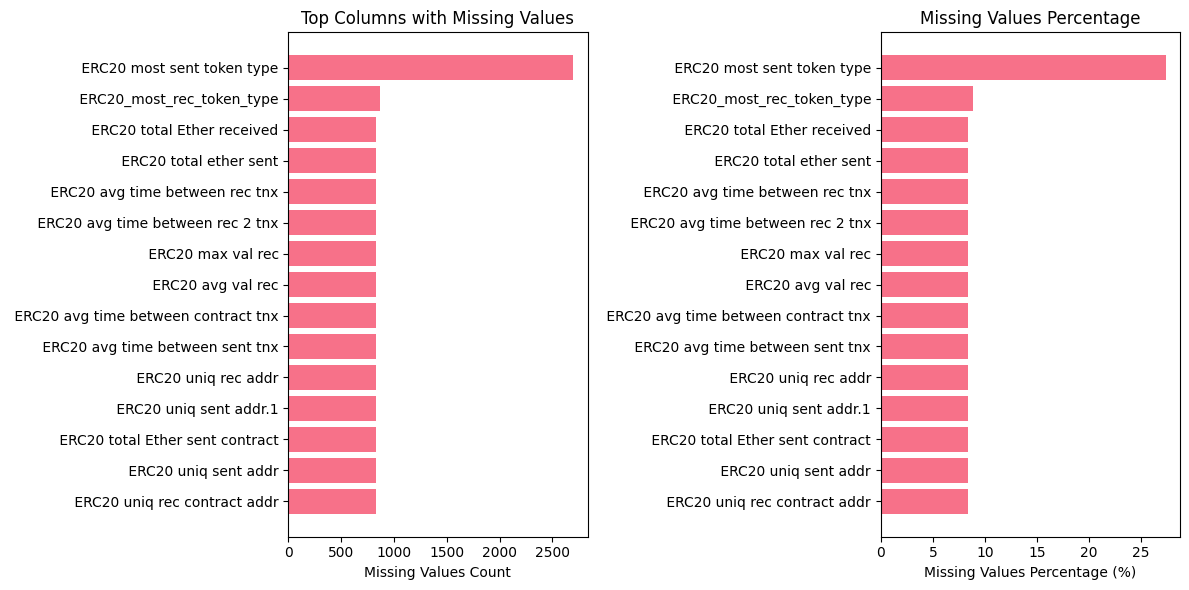


🔍 INFINITE VALUES CHECK:
------------------------------
✅ Infinite values analysis complete!


In [8]:
# Missing values analysis
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 50)

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create missing values summary
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Count', ascending=False)

# Display columns with missing values
columns_with_missing = missing_df[missing_df['Missing_Count'] > 0]

if len(columns_with_missing) > 0:
    print(f"📊 COLUMNS WITH MISSING VALUES ({len(columns_with_missing)} total):")
    display(columns_with_missing)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    
    # Plot 1: Missing values count
    plt.subplot(1, 2, 1)
    top_missing = columns_with_missing.head(15)  # Top 15 columns with missing values
    plt.barh(range(len(top_missing)), top_missing['Missing_Count'])
    plt.yticks(range(len(top_missing)), top_missing['Column'])
    plt.xlabel('Missing Values Count')
    plt.title('Top Columns with Missing Values')
    plt.gca().invert_yaxis()
    
    # Plot 2: Missing values percentage
    plt.subplot(1, 2, 2)
    plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
    plt.yticks(range(len(top_missing)), top_missing['Column'])
    plt.xlabel('Missing Values Percentage (%)')
    plt.title('Missing Values Percentage')
    plt.gca().invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
else:
    print("✅ No missing values found in the dataset!")

# Check for infinite values
print(f"\n🔍 INFINITE VALUES CHECK:")
print("-" * 30)
for col in numerical_cols:
    inf_count = np.isinf(df[col]).sum()
    if inf_count > 0:
        print(f"{col}: {inf_count} infinite values")

print("✅ Infinite values analysis complete!")

## 6. Statistical Summary of Numerical Columns

In [9]:
# Statistical summary of numerical columns
print("📊 STATISTICAL SUMMARY - NUMERICAL COLUMNS")
print("=" * 60)

# Basic statistics
numerical_stats = df[numerical_cols].describe()
print("Basic statistics for all numerical columns:")
display(numerical_stats)

# Additional statistics
print(f"\n📈 ADDITIONAL STATISTICS:")
print("-" * 40)

additional_stats = pd.DataFrame({
    'Column': numerical_cols,
    'Variance': [df[col].var() for col in numerical_cols],
    'Skewness': [df[col].skew() for col in numerical_cols],
    'Kurtosis': [df[col].kurtosis() for col in numerical_cols],
    'Range': [df[col].max() - df[col].min() for col in numerical_cols],
    'IQR': [df[col].quantile(0.75) - df[col].quantile(0.25) for col in numerical_cols]
}).round(4)

display(additional_stats)

# Identify columns with extreme skewness
print(f"\n⚠️  HIGHLY SKEWED COLUMNS (|skewness| > 2):")
highly_skewed = additional_stats[abs(additional_stats['Skewness']) > 2]['Column'].tolist()
if highly_skewed:
    for col in highly_skewed:
        skew_val = additional_stats[additional_stats['Column'] == col]['Skewness'].iloc[0]
        print(f"  {col}: {skew_val:.2f}")
else:
    print("  None found")

# Identify columns with high kurtosis
print(f"\n📊 HIGH KURTOSIS COLUMNS (kurtosis > 3):")
high_kurtosis = additional_stats[additional_stats['Kurtosis'] > 3]['Column'].tolist()
if high_kurtosis:
    for col in high_kurtosis:
        kurt_val = additional_stats[additional_stats['Column'] == col]['Kurtosis'].iloc[0]
        print(f"  {col}: {kurt_val:.2f}")
else:
    print("  None found")

📊 STATISTICAL SUMMARY - NUMERICAL COLUMNS
Basic statistics for all numerical columns:


,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9.841000e+03,9841.000000,9.841000e+03,9012.000000,9.012000e+03,9.012000e+03,9012.000000,9012.000000,9012.000000,9012.000000,9012.000000,9012.0,9012.0,9012.0,9012.0,9012.000000,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,0.000008,0.000005,283.362362,1.016092e+04,1.163832e+04,0.000008,1.477395e+03,36.255659,1.296207e+08,1.386849e+07,110.939207,5.638038,7.598535,0.003440,4.901909,0.0,0.0,0.0,0.0,485.614688,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,0.000516,0.000323,1352.404013,3.583227e+05,3.642048e+05,0.000516,2.424254e+05,447.528908,1.053858e+10,1.180390e+09,6128.634953,105.252500,81.818470,0.065698,17.246576,0.0,0.0,0.0,0.0,16883.278712,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,0.000000,0.000000,4.000000,2.262059e-01,2.670424e+00,0.000000,6.214900e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,0.000000,0.000000,8.000000,1.248680e+01,3.052963e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.00


📈 ADDITIONAL STATISTICS:
----------------------------------------


,Column,Variance,Skewness,Kurtosis,Range,IQR
0,Index,1.494804e+06,0.5730,-0.5339,4.728000e+03,1780.0000
1,FLAG,1.724000e-01,1.3421,-0.1988,1.000000e+00,0.0000
2,Avg min between sent tnx,4.616718e+08,8.4200,95.0811,4.302877e+05,565.4700
3,Avg min between received tnx,5.327656e+08,6.7453,68.0062,4.821755e+05,5480.3900
4,Time Diff between first and last (Mins),1.042889e+11,1.8100,2.9556,1.954861e+06,303754.0500
5,Sent tnx,5.733918e+05,10.4845,120.6960,1.000000e+04,10.0000
6,Received Tnx,8.851734e+05,8.8214,82.6194,1.000000e+04,26.0000
7,Number of Created Contracts,2.000685e+04,51.7202,3114.1936,9.995000e+03,0.0000
8,Unique Received From Addresses,8.917457e+04,18.1161,418.7805,9.999000e+03,4.0000
9,Unique Sent To Addresses,6.960121e+04,18.3543,410.3143,9.287000e+03,2.0000



⚠️  HIGHLY SKEWED COLUMNS (|skewness| > 2):
  Avg min between sent tnx: 8.42
  Avg min between received tnx: 6.75
  Sent tnx: 10.48
  Received Tnx: 8.82
  Number of Created Contracts: 51.72
  Unique Received From Addresses: 18.12
  Unique Sent To Addresses: 18.35
  min value received: 23.30
  max value received : 46.42
  avg val received: 96.51
  min val sent: 73.43
  max val sent: 59.83
  avg val sent: 25.53
  min value sent to contract: 79.85
  max val sent to contract: 78.85
  avg value sent to contract: 63.61
  total transactions (including tnx to create contract: 6.85
  total Ether sent: 62.36
  total ether received: 58.80
  total ether sent contracts: 78.85
   Total ERC20 tnxs: 19.93
   ERC20 total Ether received: 94.81
   ERC20 total ether sent: 94.79
   ERC20 total Ether sent contract: 59.28
   ERC20 uniq sent addr: 40.65
   ERC20 uniq rec addr: 37.59
   ERC20 uniq sent addr.1: 23.72
   ERC20 uniq rec contract addr: 16.33
   ERC20 min val rec: 50.54
   ERC20 max val rec: 94.83

## 7. Categorical Columns Analysis

📝 CATEGORICAL COLUMNS ANALYSIS

🔍 Column: Address
-----------------
Unique values: 9816
Total values: 9841
Uniqueness ratio: 0.9975
Top 10 most frequent values:
  0x4cb6f8f060365dd2e4eb949609dd6293bb950ae2: 2 (0.02%)
  0x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb9: 2 (0.02%)
  0x4cbfd5b6b8d69c12fab524a01f5283fcc75d5bc9: 2 (0.02%)
  0x4cc930a91865e30feff38465ace57711e3923881: 2 (0.02%)
  0x4cce03d1fd8aa1d6172cec74d75bd1df9e6a8ac2: 2 (0.02%)
  0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f: 2 (0.02%)
  0x4cd526aa2db72eb1fd557b37c6b0394acd35b212: 2 (0.02%)
  0x4cdf46740d51a0f6735fe3f1d28fadf00c20cd34: 2 (0.02%)
  0x4c13f6966dc24c92489344f0fd6f0e61f3489b84: 2 (0.02%)
  0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1: 2 (0.02%)
  ... and 9806 other unique values

🔍 Column:  ERC20 most sent token type
-------------------------------------
Unique values: 304
Total values: 9841
Uniqueness ratio: 0.0309
Top 10 most frequent values:
  0: 4399 (44.70%)
   : 1191 (12.10%)
  EOS: 138 (1.40%)
  OmiseGO: 137 (1.

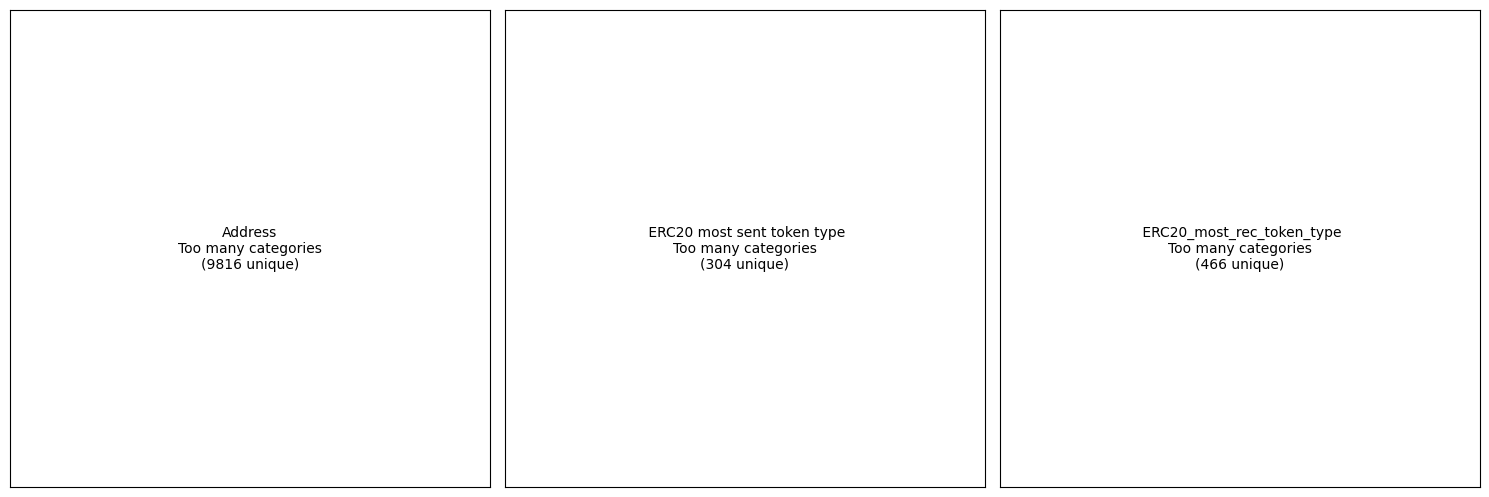

In [10]:
# Categorical columns analysis
print("📝 CATEGORICAL COLUMNS ANALYSIS")
print("=" * 50)

if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\n🔍 Column: {col}")
        print("-" * (len(col) + 10))
        
        # Basic info
        unique_count = df[col].nunique()
        total_count = len(df[col])
        print(f"Unique values: {unique_count}")
        print(f"Total values: {total_count}")
        print(f"Uniqueness ratio: {unique_count/total_count:.4f}")
        
        # Value counts
        if unique_count <= 20:  # Show all values if reasonable number
            value_counts = df[col].value_counts()
            print(f"Value counts:")
            for value, count in value_counts.items():
                percentage = (count / total_count) * 100
                print(f"  {value}: {count} ({percentage:.2f}%)")
        else:  # Show top 10 for high cardinality columns
            print(f"Top 10 most frequent values:")
            value_counts = df[col].value_counts().head(10)
            for value, count in value_counts.items():
                percentage = (count / total_count) * 100
                print(f"  {value}: {count} ({percentage:.2f}%)")
            
            remaining = unique_count - 10
            if remaining > 0:
                print(f"  ... and {remaining} other unique values")
    
    # Visualize categorical columns if manageable
    if len(categorical_cols) <= 6:
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()
        
        for i, col in enumerate(categorical_cols):
            if i < len(axes):
                if df[col].nunique() <= 15:  # Only plot if not too many categories
                    value_counts = df[col].value_counts().head(10)
                    value_counts.plot(kind='bar', ax=axes[i])
                    axes[i].set_title(f'{col}\n(Top 10 values)')
                    axes[i].tick_params(axis='x', rotation=45)
                else:
                    axes[i].text(0.5, 0.5, f'{col}\nToo many categories\n({df[col].nunique()} unique)', 
                               ha='center', va='center', transform=axes[i].transAxes)
                    axes[i].set_xticks([])
                    axes[i].set_yticks([])
        
        # Hide empty subplots
        for i in range(len(categorical_cols), len(axes)):
            axes[i].set_visible(False)
            
        plt.tight_layout()
        plt.show()

else:
    print("ℹ️  No categorical columns found in the dataset")
    print("(All columns appear to be numerical)")

## 8. Data Distribution Visualization

📊 DATA DISTRIBUTION VISUALIZATION
📈 Distribution plots for key numerical columns:


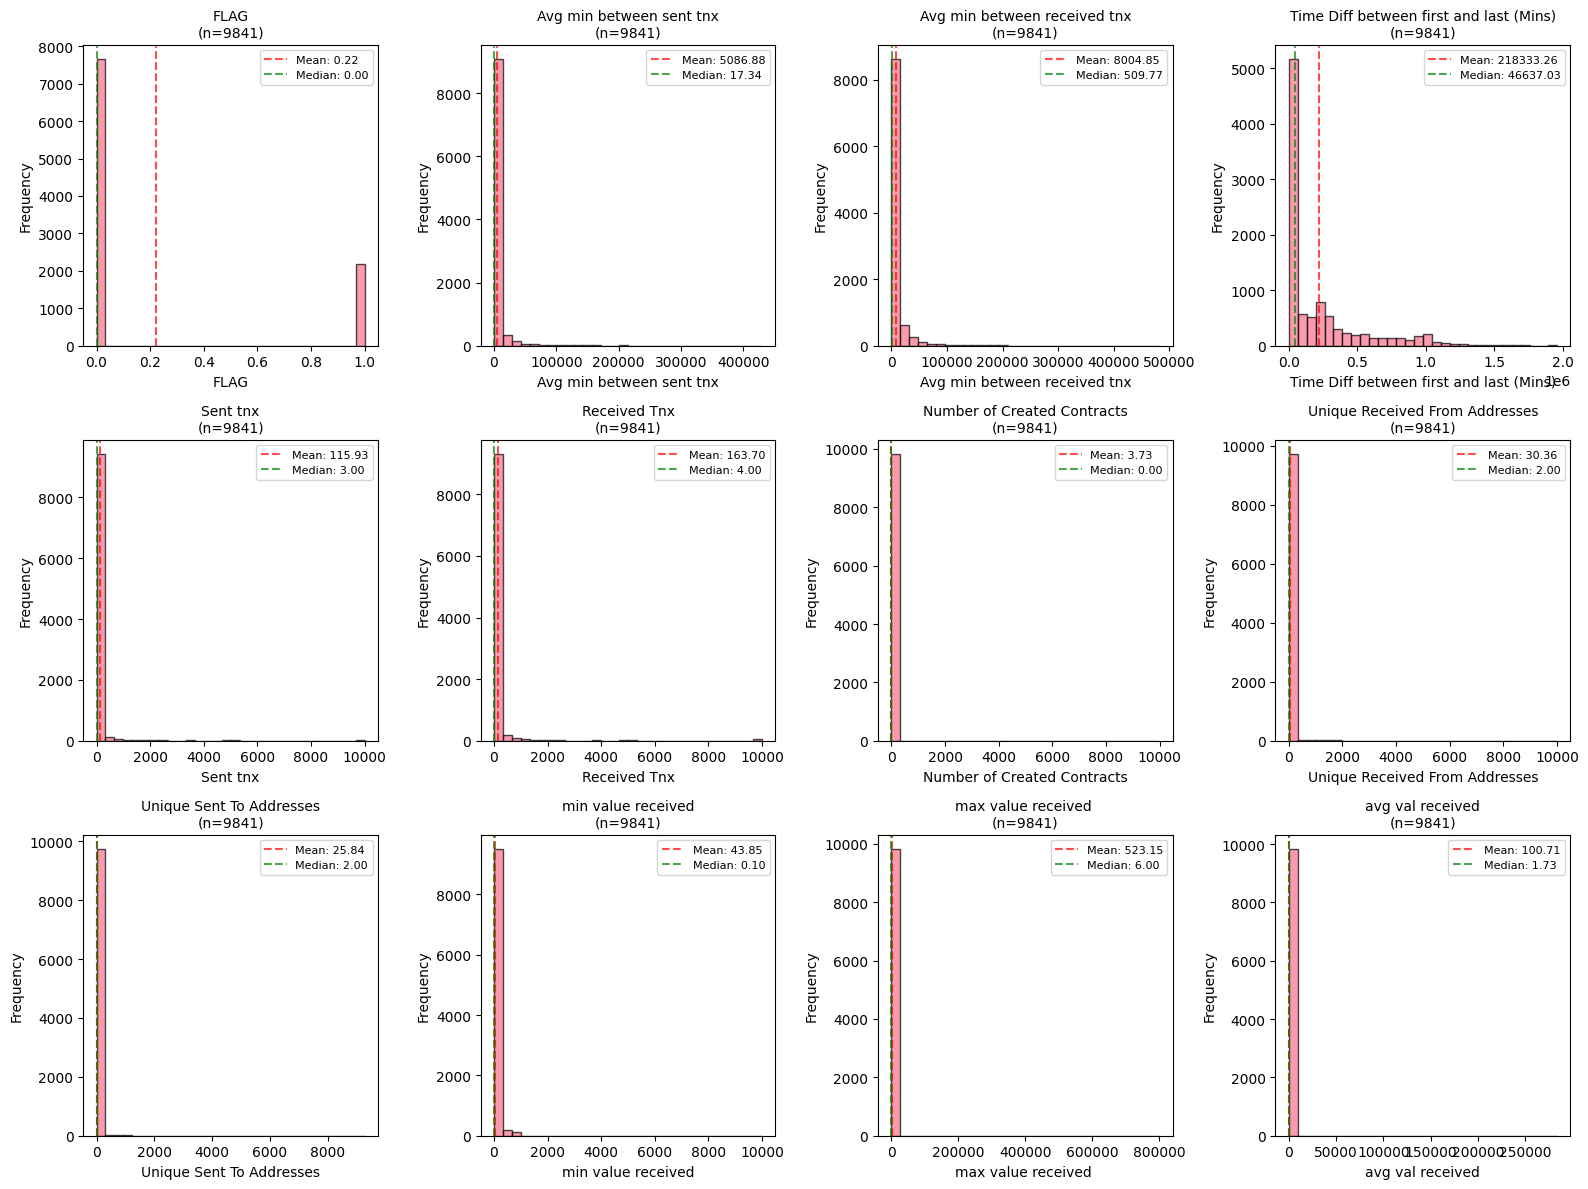


📦 Box plots for outlier detection:


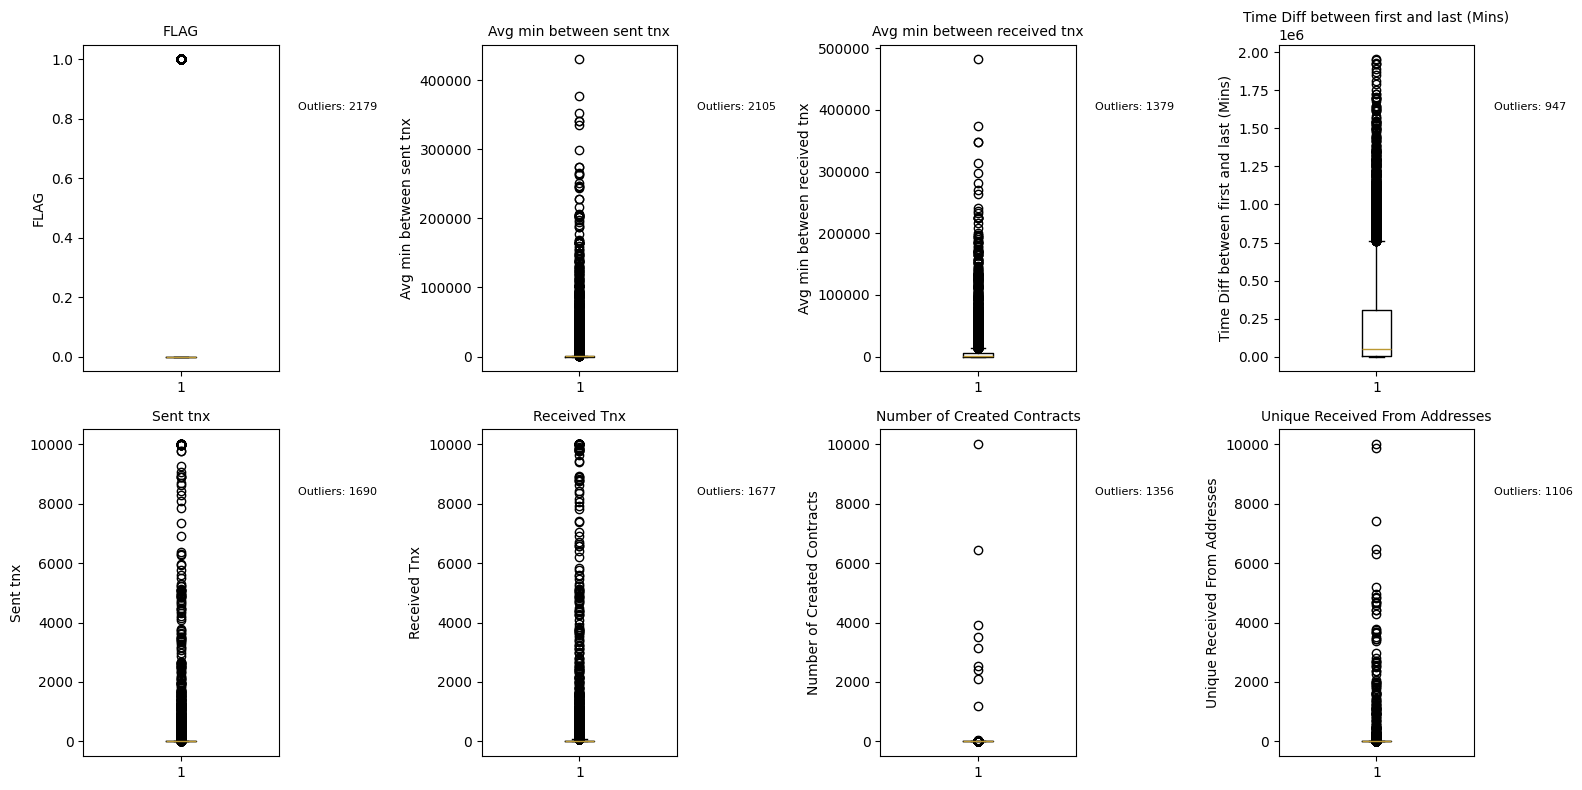

In [11]:
# Data distribution visualization
print("📊 DATA DISTRIBUTION VISUALIZATION")
print("=" * 50)

# Select key columns for visualization (exclude identifiers and categorical)
exclude_for_viz = ['Index', 'Address'] + categorical_cols
viz_columns = [col for col in numerical_cols if col not in exclude_for_viz]

# Limit to first 12 columns for readability
viz_columns = viz_columns[:12]

if len(viz_columns) > 0:
    # 1. Histograms for distribution
    print("📈 Distribution plots for key numerical columns:")
    
    n_cols = 4
    n_rows = (len(viz_columns) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(16, 4 * n_rows))
    
    for i, col in enumerate(viz_columns):
        plt.subplot(n_rows, n_cols, i + 1)
        
        # Handle potential infinite values
        clean_data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
        
        if len(clean_data) > 0:
            plt.hist(clean_data, bins=30, alpha=0.7, edgecolor='black')
            plt.title(f'{col}\n(n={len(clean_data)})', fontsize=10)
            plt.xlabel(col)
            plt.ylabel('Frequency')
            
            # Add statistics text
            plt.axvline(clean_data.mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {clean_data.mean():.2f}')
            plt.axvline(clean_data.median(), color='green', linestyle='--', alpha=0.7, label=f'Median: {clean_data.median():.2f}')
            plt.legend(fontsize=8)
        else:
            plt.text(0.5, 0.5, 'No valid data', ha='center', va='center')
            plt.title(f'{col}\n(No data)', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # 2. Box plots for outlier detection
    print("\n📦 Box plots for outlier detection:")
    
    plt.figure(figsize=(16, 8))
    
    # Select subset for box plots (to avoid overcrowding)
    box_columns = viz_columns[:8]
    
    for i, col in enumerate(box_columns):
        plt.subplot(2, 4, i + 1)
        
        clean_data = df[col].replace([np.inf, -np.inf], np.nan).dropna()
        
        if len(clean_data) > 0:
            plt.boxplot(clean_data)
            plt.title(f'{col}', fontsize=10)
            plt.ylabel(col)
            
            # Add outlier statistics
            Q1 = clean_data.quantile(0.25)
            Q3 = clean_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = clean_data[(clean_data < lower_bound) | (clean_data > upper_bound)]
            plt.text(1.1, 0.8, f'Outliers: {len(outliers)}', transform=plt.gca().transAxes, fontsize=8)
        else:
            plt.text(0.5, 0.5, 'No valid data', ha='center', va='center')
            plt.title(f'{col}\n(No data)', fontsize=10)
    
    plt.tight_layout()
    plt.show()

else:
    print("⚠️  No suitable numerical columns found for visualization")

## 9. Correlation Analysis

🔗 CORRELATION ANALYSIS


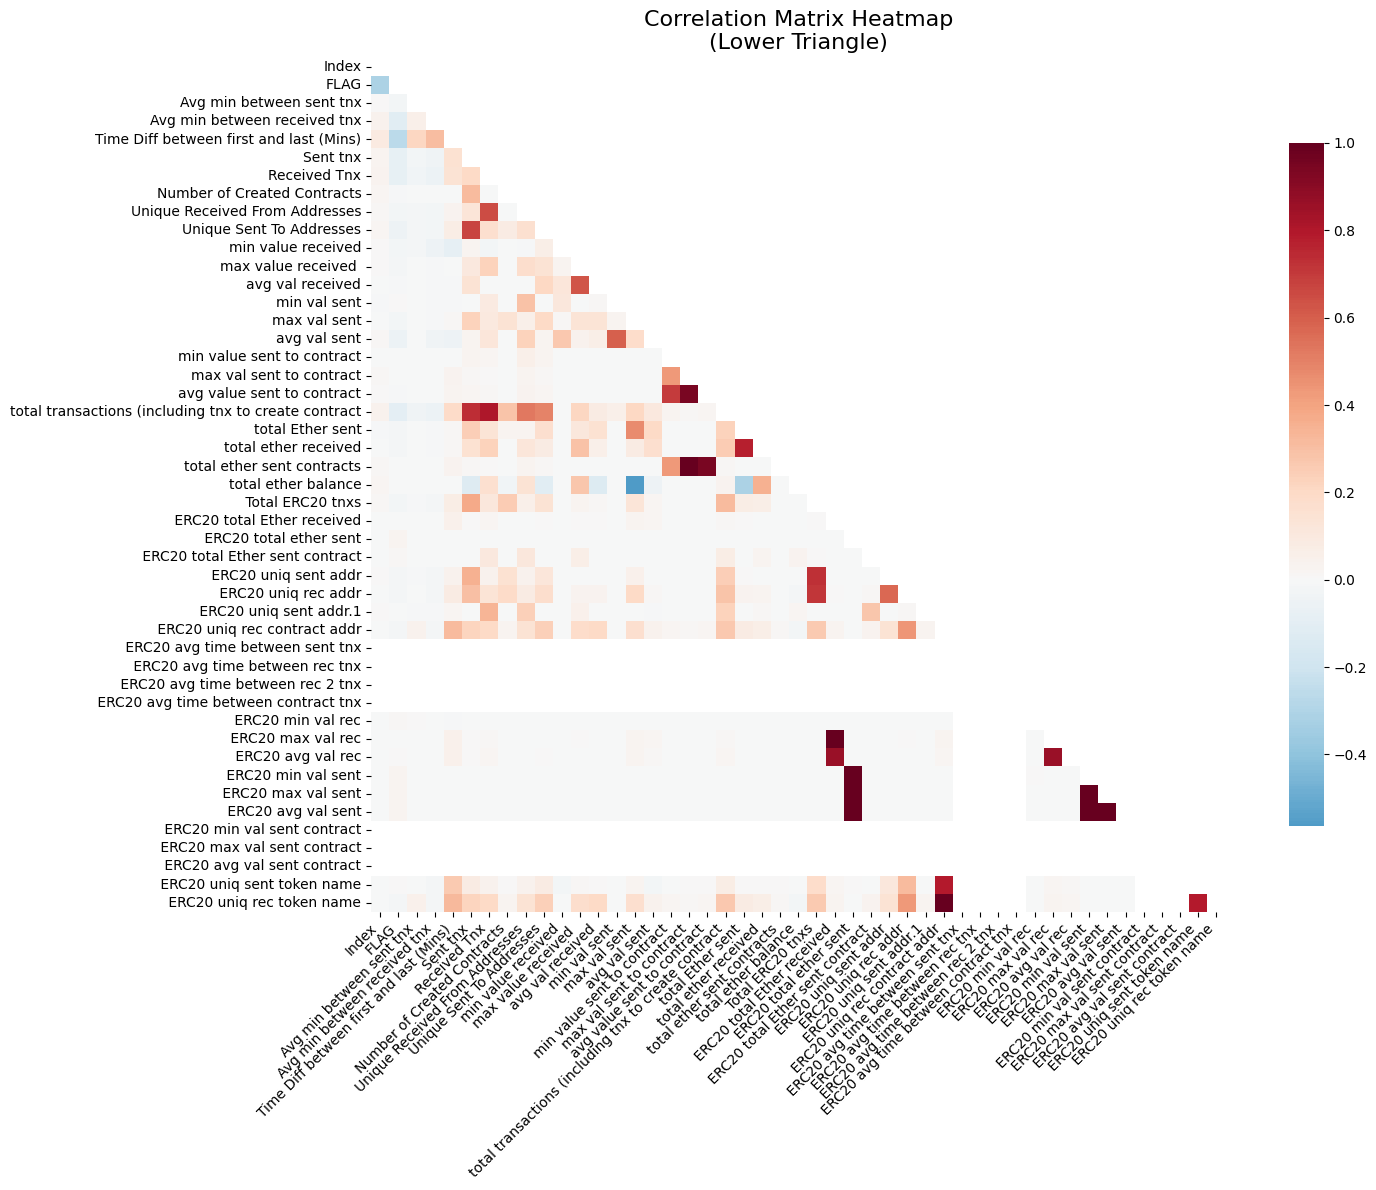


🔍 HIGH CORRELATION PAIRS (|correlation| > 0.7):
------------------------------------------------------------


,Feature_1,Feature_2,Correlation
3,max val sent to contract,total ether sent contracts,1.000000
8,ERC20 total Ether received,ERC20 max val rec,0.999967
18,ERC20 max val sent,ERC20 avg val sent,0.999952
17,ERC20 min val sent,ERC20 avg val sent,0.999785
16,ERC20 min val sent,ERC20 max val sent,0.999729
11,ERC20 total ether sent,ERC20 max val sent,0.999649
14,ERC20 uniq rec contract addr,ERC20 uniq rec token name,0.999642
12,ERC20 total ether sent,ERC20 avg val sent,0.999566
10,ERC20 total ether sent,ERC20 min val sent,0.999311
4,avg value sent to contract,total ether sent contracts,0.949608



🎯 CORRELATION WITH TARGET VARIABLE (FLAG):
--------------------------------------------------
Top 15 features correlated with fraud:
 1. Index: -0.3163
 2. Time Diff between first and last (Mins): -0.2694
 3. Avg min between received tnx: -0.1185
 4. total transactions (including tnx to create contract: -0.1003
 5. Received Tnx: -0.0793
 6. Sent tnx: -0.0780
 7. avg val sent: -0.0636
 8. Unique Sent To Addresses: -0.0456
 9. Unique Received From Addresses: -0.0319
10. Avg min between sent tnx: -0.0298
11.  Total ERC20 tnxs: -0.0257
12.  ERC20 min val sent: +0.0254
13.  ERC20 avg val sent: +0.0250
14.  ERC20 max val sent: +0.0250
15.  ERC20 total ether sent: +0.0248


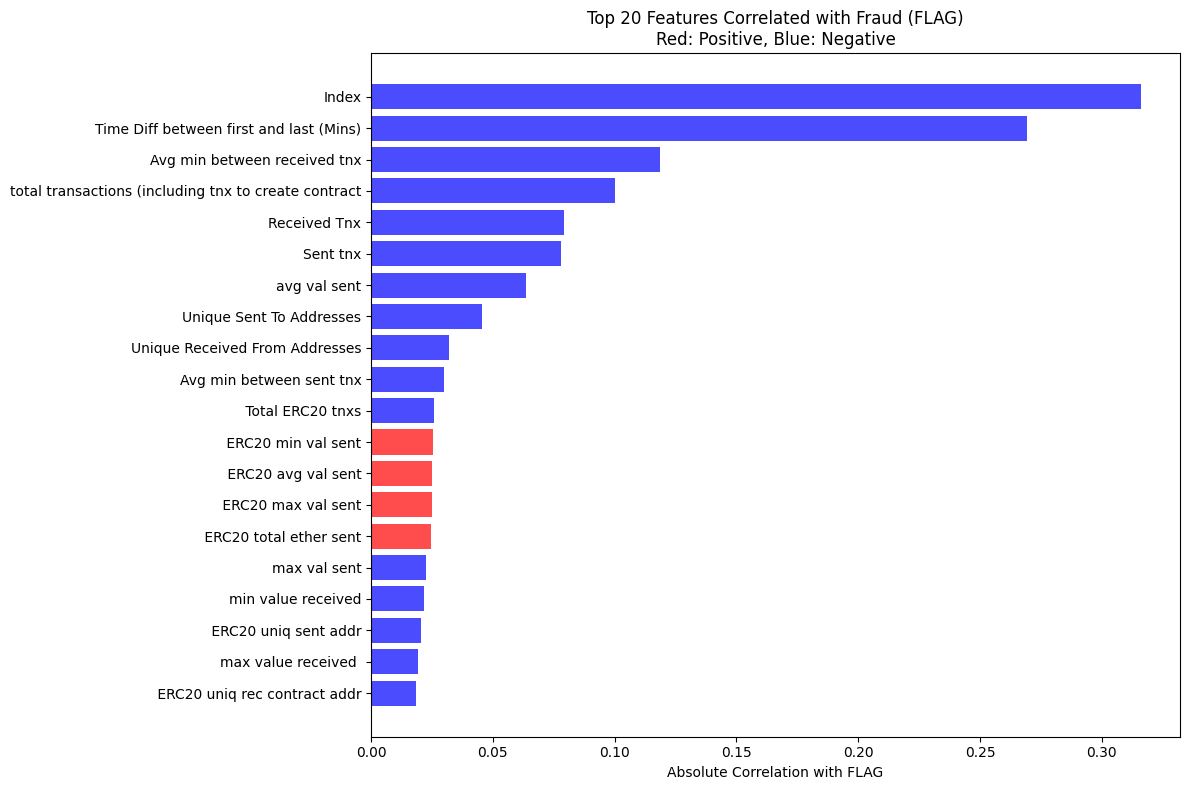


✅ Correlation analysis complete!


In [12]:
# Correlation analysis
print("🔗 CORRELATION ANALYSIS")
print("=" * 50)

# Calculate correlation matrix for numerical columns
correlation_matrix = df[numerical_cols].corr()

# 1. Full correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, 
            annot=False,  # Don't annotate due to size
            cmap='RdBu_r', 
            center=0,
            square=True,
            mask=mask,
            cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap\n(Lower Triangle)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2. Find highly correlated pairs
print(f"\n🔍 HIGH CORRELATION PAIRS (|correlation| > 0.7):")
print("-" * 60)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': corr_val
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    display(high_corr_df)
else:
    print("No highly correlated pairs found (|correlation| > 0.7)")

# 3. Correlation with target variable (FLAG)
if 'FLAG' in numerical_cols:
    print(f"\n🎯 CORRELATION WITH TARGET VARIABLE (FLAG):")
    print("-" * 50)
    
    target_correlations = correlation_matrix['FLAG'].abs().sort_values(ascending=False)
    target_correlations = target_correlations[target_correlations.index != 'FLAG']  # Remove self-correlation
    
    print("Top 15 features correlated with fraud:")
    for i, (feature, corr) in enumerate(target_correlations.head(15).items()):
        direction = "+" if correlation_matrix.loc['FLAG', feature] > 0 else "-"
        print(f"{i+1:2d}. {feature}: {direction}{corr:.4f}")
    
    # Visualize top correlations with target
    plt.figure(figsize=(12, 8))
    top_features = target_correlations.head(20)
    colors = ['red' if correlation_matrix.loc['FLAG', feature] > 0 else 'blue' for feature in top_features.index]
    
    plt.barh(range(len(top_features)), top_features.values, color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features.index)
    plt.xlabel('Absolute Correlation with FLAG')
    plt.title('Top 20 Features Correlated with Fraud (FLAG)\nRed: Positive, Blue: Negative')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

print("\n✅ Correlation analysis complete!")

## 10. Key Findings Summary

In [13]:
# Key findings summary
print("📋 KEY FINDINGS SUMMARY")
print("=" * 60)

print("🔍 DATASET CHARACTERISTICS:")
print(f"  • Total records: {df.shape[0]:,}")
print(f"  • Total features: {df.shape[1]}")
print(f"  • Numerical features: {len(numerical_cols)}")
print(f"  • Categorical features: {len(categorical_cols)}")
print(f"  • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if 'FLAG' in df.columns:
    fraud_ratio = df['FLAG'].mean() * 100
    print(f"\n🎯 TARGET VARIABLE:")
    print(f"  • Fraud ratio: {fraud_ratio:.2f}%")
    print(f"  • Class imbalance: {'High' if fraud_ratio < 10 else 'Moderate' if fraud_ratio < 30 else 'Low'}")

# Missing values summary
total_missing = df.isnull().sum().sum()
if total_missing > 0:
    print(f"\n⚠️  DATA QUALITY ISSUES:")
    print(f"  • Total missing values: {total_missing:,}")
    print(f"  • Columns with missing values: {(df.isnull().sum() > 0).sum()}")
else:
    print(f"\n✅ DATA QUALITY:")
    print(f"  • No missing values detected")

# Statistical insights
if len(numerical_cols) > 0:
    stats_df = df[numerical_cols].describe()
    high_variance_cols = [col for col in numerical_cols if df[col].var() > df[col].mean() * 10]
    
    print(f"\n📊 STATISTICAL INSIGHTS:")
    print(f"  • High variance columns: {len(high_variance_cols)}")
    if len(high_variance_cols) > 0 and len(high_variance_cols) <= 5:
        print(f"    {high_variance_cols}")

# Correlation insights
if 'FLAG' in numerical_cols:
    target_corr = df[numerical_cols].corr()['FLAG'].abs().sort_values(ascending=False)
    strong_predictors = target_corr[target_corr > 0.3].index.tolist()
    strong_predictors = [col for col in strong_predictors if col != 'FLAG']
    
    print(f"\n🔗 CORRELATION INSIGHTS:")
    print(f"  • Strong predictors (|corr| > 0.3): {len(strong_predictors)}")
    if len(strong_predictors) > 0 and len(strong_predictors) <= 5:
        print(f"    {strong_predictors}")

print(f"\n💡 RECOMMENDATIONS FOR PREPROCESSING:")
print("  1. Handle class imbalance (if fraud ratio < 10%)")
print("  2. Consider feature scaling/normalization for ML models")
print("  3. Check for outliers in high-variance columns")
print("  4. Consider feature selection based on correlation analysis")
if len(categorical_cols) > 0:
    print("  5. Encode categorical variables appropriately")
print("  6. Validate data quality and handle any anomalies")

print(f"\n🚀 NEXT STEPS:")
print("  • Proceed with data preprocessing")
print("  • Implement feature engineering if needed")
print("  • Split data for training/validation/testing")
print("  • Train baseline and advanced models")

print("\n" + "=" * 60)
print("📊 EDA COMPLETE! Dataset is ready for preprocessing and modeling.")
print("=" * 60)

📋 KEY FINDINGS SUMMARY
🔍 DATASET CHARACTERISTICS:
  • Total records: 9,841
  • Total features: 50
  • Numerical features: 47
  • Categorical features: 3
  • Memory usage: 5.31 MB

🎯 TARGET VARIABLE:
  • Fraud ratio: 22.14%
  • Class imbalance: Moderate

⚠️  DATA QUALITY ISSUES:
  • Total missing values: 22,635
  • Columns with missing values: 25

📊 STATISTICAL INSIGHTS:
  • High variance columns: 34

🔗 CORRELATION INSIGHTS:
  • Strong predictors (|corr| > 0.3): 1
    ['Index']

💡 RECOMMENDATIONS FOR PREPROCESSING:
  1. Handle class imbalance (if fraud ratio < 10%)
  2. Consider feature scaling/normalization for ML models
  3. Check for outliers in high-variance columns
  4. Consider feature selection based on correlation analysis
  5. Encode categorical variables appropriately
  6. Validate data quality and handle any anomalies

🚀 NEXT STEPS:
  • Proceed with data preprocessing
  • Implement feature engineering if needed
  • Split data for training/validation/testing
  • Train baseline